In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os

# Data Preperation

In [2]:
data = pd.read_csv(r"C:\Users\vaasimak\Desktop\CI-SL\dataset\dataset1.csv") #reading the csv files using pandas

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.isnull().sum().head

<bound method NDFrame.head of label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64>

In [6]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
len(data)

42000

## Seperate the dataset to X , y

In [4]:
y = data['label']
X = data.drop(columns='label')
X=pd.DataFrame(X)

In [9]:
len(y)

42000

In [10]:
x_np =X.to_numpy()

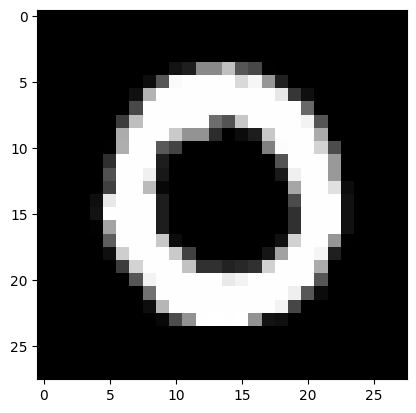

In [11]:
plt.imshow(x_np[1].reshape(28,28),cmap ='gray')

## Downsampling X, y

In [5]:
X_downsampled=resample(
    X,
    replace=False,
    n_samples=10000,
    random_state=42)

In [13]:
X_downsampled.shape

(10000, 784)

In [6]:
y_downsampled=resample(
    y,
    replace=False,
    n_samples=10000,
    random_state=42)

In [15]:
y_downsampled.shape

(10000,)

## Split and Scale the data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_downsampled,y_downsampled,random_state=40)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
X_scaled_train =pd.DataFrame(X_scaled_train)
X_scaled_test=pd.DataFrame(X_scaled_test)

In [9]:
X_scaled_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,...,7.500000e+03,7.500000e+03,7.500000e+03,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.084259e-17,-1.894781e-18,-1.421085e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000067e+00,1.000067e+00,1.000067e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.470053e-02,-2.205782e-02,-1.633211e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.470053e-02,-2.205782e-02,-1.633211e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.470053e-02,-2.205782e-02,-1.633211e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.470053e-02,-2.205782e-02,-1.633211e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.802680e+01,5.046613e+01,6.122908e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train SVM (linear, rbf) Models before KCPA and LDA

## Linear SVM

train accuracy:  1.0 

test accuracy: 0.9108 



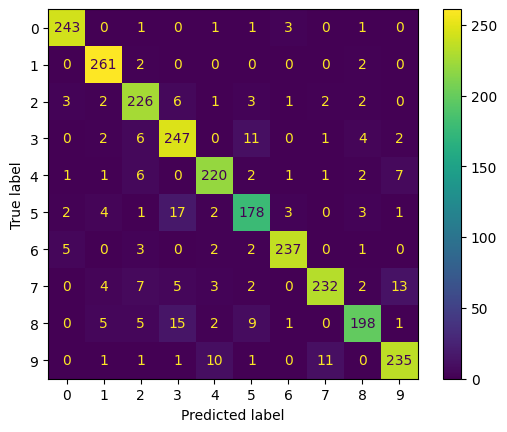

In [10]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_scaled_train, y_train)
y_pred_test = linear_svm.predict(X_scaled_test)
y_pred_train = linear_svm.predict(X_scaled_train)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print("test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

## RBF SVM

train accuracy:  0.9857333333333334 

 test accuracy: 0.962 



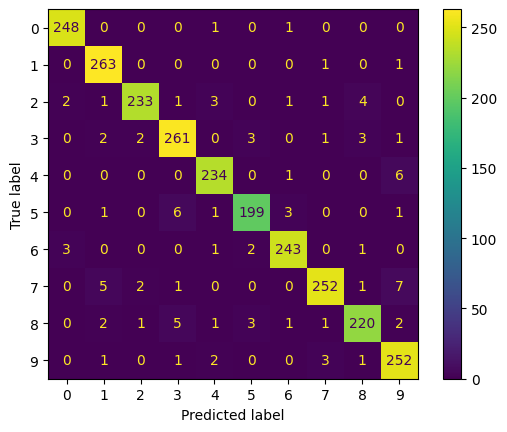

In [11]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred_test = rbf_svm.predict(X_test)
y_pred_train = rbf_svm.predict(X_train)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print(" test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

# KPCA with RBF Kernel

## Visualise KPCA to find the number of principal components

In [13]:
from sklearn.decomposition import KernelPCA
import seaborn as sns
kpca = KernelPCA(kernel='rbf', n_components=784)
kpca=kpca.fit_transform(X_scaled_train)
explained_variance=np.var(kpca, axis=0 )

In [14]:
explained_variance_ratio=explained_variance/ np.sum(explained_variance)*100
cumulative_variance_ratio=np.cumsum(explained_variance_ratio)
kpca_df=pd.DataFrame()
kpca_df['cumulative explained variance']= cumulative_variance_ratio
kpca_df['explained_variance_ratio']= explained_variance_ratio
display(kpca_df)

,cumulative explained variance,explained_variance_ratio
0,10.010179,10.010179
1,14.274098,4.263919
2,18.031954,3.757856
3,21.286833,3.254878
4,23.920424,2.633592
...,...,...
779,99.910117,0.022519
780,99.932621,0.022504
781,99.955104,0.022483
782,99.977569,0.022465


In [17]:
cumulative_variance_ratio_df = pd.DataFrame(cumulative_variance_ratio)
len(cumulative_variance_ratio_df.loc[cumulative_variance_ratio_df[0] <= 95])

579

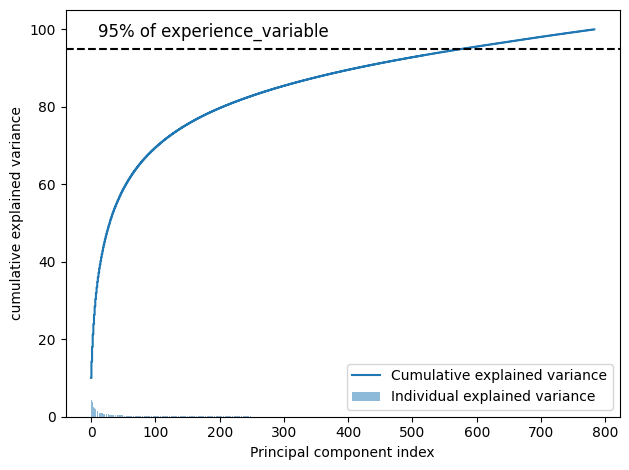

In [ ]:
plt.bar(range(0,len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumulative_variance_ratio)), cumulative_variance_ratio, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.axhline(y=95,c='black',linestyle='--')
plt.ylabel('cumulative explained variance')
plt.annotate('95% of experience_variable',
            xy=(10, 98),fontsize=12)
plt.tight_layout()
plt.show()

## Building KPCA with the right principal components

In [20]:
from sklearn.decomposition import KernelPCA
Kernel_pca = KernelPCA(n_components = 579 ,kernel= "rbf",n_jobs=-1,fit_inverse_transform=True)
X_train_kpca = Kernel_pca.fit_transform(X_scaled_train)
X_test_kpca= Kernel_pca.transform(X_scaled_test)

X_train_kpca=pd.DataFrame(X_train_kpca)
X_test_kpca=pd.DataFrame(X_test_kpca)


In [24]:
X_train_kpca.shape

(7500, 579)

In [28]:
X_scaled_train.shape

(7500, 784)

In [26]:
X_train_reduced = Kernel_pca.inverse_transform(X_train_kpca)
X_train_unscaled = scaler.inverse_transform(X_scaled_train)

### Visualize the difference between the original image and the image after KPCA

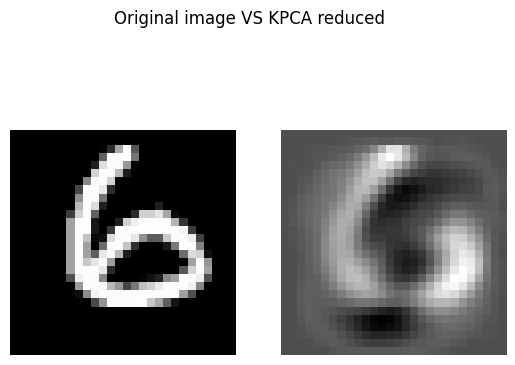

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.matshow(X_train_unscaled[6].reshape(28,28), cmap='gray')
ax2.matshow(X_train_reduced[6].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS KPCA reduced".format(y_train))
plt.show()

## Training SVM (linear, rbf) Models

### Linear Model

train accuracy:  0.9484 

test accuracy: 0.9244 



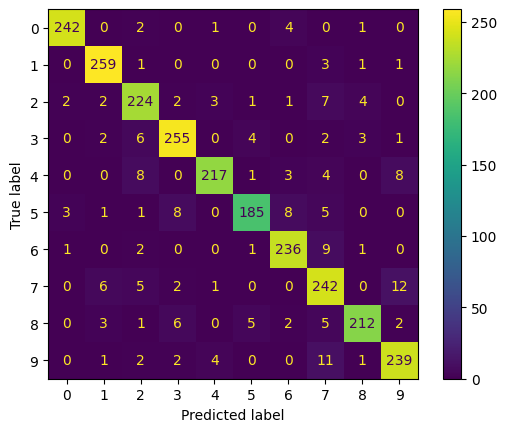

In [61]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_kpca, y_train)
y_pred_test = linear_svm.predict(X_test_kpca)
y_pred_train = linear_svm.predict(X_train_kpca)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print("test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

### RBF Model

train accuracy:  0.9797333333333333 

 test accuracy: 0.9328 



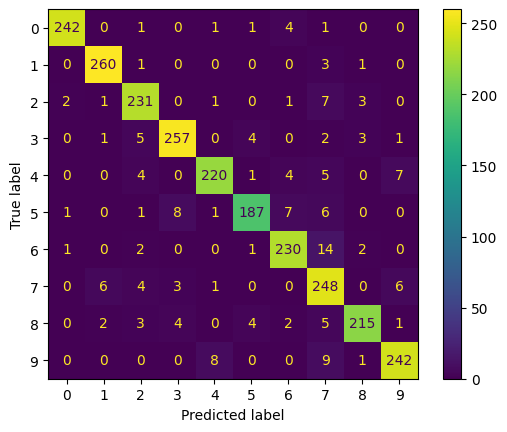

In [74]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_kpca, y_train)
y_pred_test = rbf_svm.predict(X_test_kpca)
y_pred_train = rbf_svm.predict(X_train_kpca)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print(" test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

# KPCA+LDA with RBF Kernel

## Searching the best component for the LDA

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=None)
X_train_kpca_lda = lda.fit_transform(X_train_kpca, y_train)
# Set initial variance explained so far
total_variance = 0.0
# Set initial number of features
n_components = 0
# For the explained variance of each feature:
for explained_variance in lda.explained_variance_ratio_:
    # Add the explained variance to the total
    total_variance += explained_variance
    # Add one to the number of components
    n_components += 1
    
    # If we reach our goal level of explained variance
    if total_variance >= 0.95:
        break
        
# Return the number of components
print(n_components)

8


## Building LDA with the right component

In [65]:
lda = LDA(n_components=8, )
X_train_kpca_lda = lda.fit_transform(X_train_kpca, y_train)
X_test_kpca_lda=lda.transform(X_test_kpca)

## Training SVM (linear, rbf) Models

### Linear Model

Train accuracy: 0.958 

Test accuracy: 0.9344 



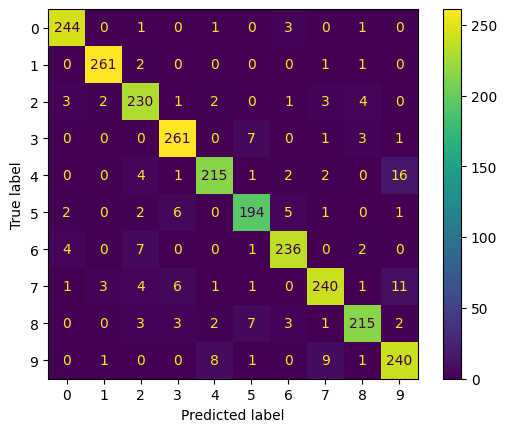

In [71]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_kpca_lda, y_train)
y_pred_test = linear_svm.predict(X_test_kpca_lda)
y_pred_train = linear_svm.predict(X_train_kpca_lda)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

### RBF Model

Train accuracy: 0.9548 

Test accuracy: 0.9292 



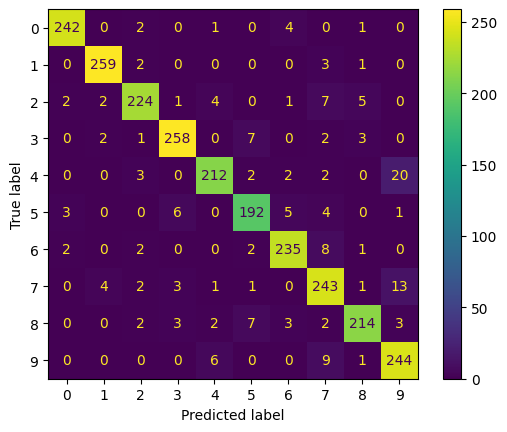

In [73]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_kpca_lda, y_train)
y_pred_test = rbf_svm.predict(X_test_kpca_lda)
y_pred_train = rbf_svm.predict(X_train_kpca_lda)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

## KPCA with Sigmoid Kernel

## Visualise KPCA to find the number of principal components

In [75]:
from sklearn.decomposition import KernelPCA
import seaborn as sns
kpca = KernelPCA(kernel='sigmoid', n_components=784)
kpca=kpca.fit_transform(X_scaled_train)
explained_variance=np.var(kpca, axis=0 )

In [76]:
explained_variance_ratio=explained_variance/ np.sum(explained_variance)*100
cumulative_variance_ratio=np.cumsum(explained_variance_ratio)
kpca_df=pd.DataFrame()
kpca_df['cumulative explained variance']= cumulative_variance_ratio
kpca_df['explained_variance_ratio']= explained_variance_ratio
display(kpca_df)

,cumulative explained variance,explained_variance_ratio
0,8.800310,8.800310
1,15.019349,6.219040
2,20.951083,5.931733
3,25.401624,4.450541
4,29.183188,3.781565
...,...,...
779,99.997237,0.000700
780,99.997936,0.000699
781,99.998629,0.000693
782,99.999315,0.000687


In [77]:
cumulative_variance_ratio_df = pd.DataFrame(cumulative_variance_ratio)

len(cumulative_variance_ratio_df.loc[cumulative_variance_ratio_df[0] <= 95])

216

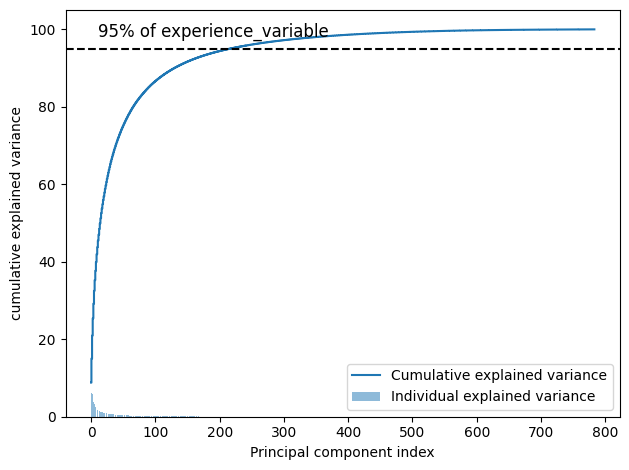

In [78]:
plt.bar(range(0,len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumulative_variance_ratio)), cumulative_variance_ratio, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.axhline(y=95,c='black',linestyle='--')
plt.ylabel('cumulative explained variance')
plt.annotate('95% of experience_variable',
            xy=(10, 98),fontsize=12)
plt.tight_layout()
plt.show()

## Building KPCA with the right principal components

In [79]:
from sklearn.decomposition import KernelPCA
Kernel_pca = KernelPCA(n_components = 216 ,kernel= "sigmoid",n_jobs=-1,fit_inverse_transform=True)# extracts 2 features, specify the kernel as rbf
X_train_kpca = Kernel_pca.fit_transform(X_scaled_train)
X_test_kpca= Kernel_pca.transform(X_scaled_test)

X_train_kpca=pd.DataFrame(X_train_kpca)
X_test_kpca=pd.DataFrame(X_test_kpca)

In [80]:
X_train_reduced = Kernel_pca.inverse_transform(X_train_kpca)
X_train_unscaled = scaler.inverse_transform(X_scaled_train)

### Visualize the difference between the original image and the image after KPCA

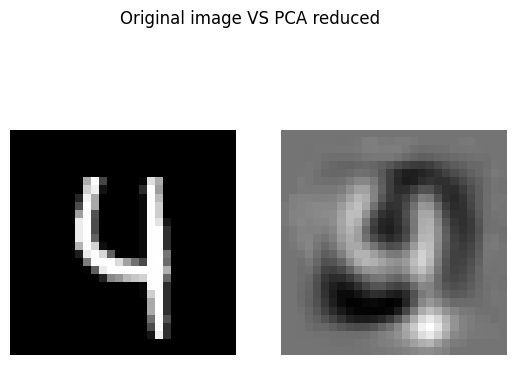

In [81]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.matshow(X_train_unscaled[1].reshape(28,28), cmap='gray')
ax2.matshow(X_train_reduced[1].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS PCA reduced".format(y_train[1]))
plt.show()

## Training SVM (linear, rbf) Models

### Linear Model

train accuracy:  0.9265333333333333 

test accuracy: 0.912 



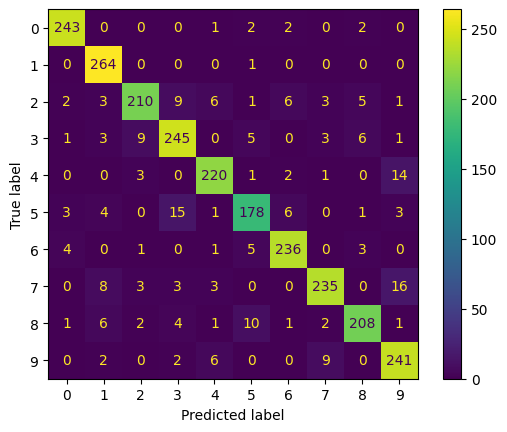

In [82]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_kpca, y_train)
y_pred_test = linear_svm.predict(X_test_kpca)
y_pred_train = linear_svm.predict(X_train_kpca)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print("test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

### RBF Model

train accuracy:  0.9917333333333334 

 test accuracy: 0.9596 



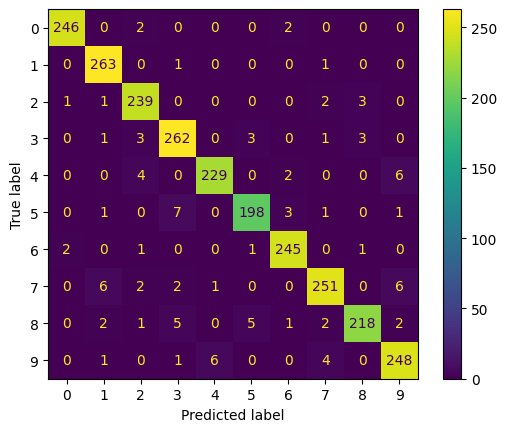

In [83]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_kpca, y_train)
y_pred_test = rbf_svm.predict(X_test_kpca)
y_pred_train = rbf_svm.predict(X_train_kpca)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print(" test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

# KPCA+LDA with Sigmoid Kernel

## Searching for the best component for LDA

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=None)
X_train_kpca_lda = lda.fit_transform(X_train_kpca, y_train)
# Set initial variance explained so far
total_variance = 0.0
# Set initial number of features
n_components = 0
# For the explained variance of each feature:
for explained_variance in lda.explained_variance_ratio_:
    # Add the explained variance to the total
    total_variance += explained_variance
    # Add one to the number of components
    n_components += 1
    
    # If we reach our goal level of explained variance
    if total_variance >= 0.95:
        break
        
# Return the number of components
print(n_components)

8


## Building LDA with the right component

In [85]:
lda = LDA(n_components=8)
X_train_kpca_lda = lda.fit_transform(X_train_kpca, y_train)
X_test_kpca_lda=lda.transform(X_test_kpca)

## Training SVM (linear, rbf) models

### Linear Model

Train accuracy: 0.8932 

Test accuracy: 0.8696 



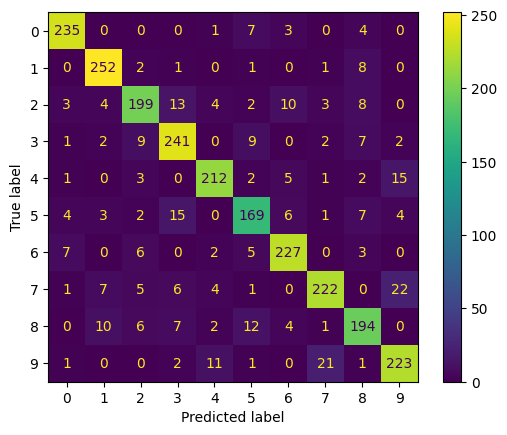

In [86]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_kpca_lda, y_train)
y_pred_test = linear_svm.predict(X_test_kpca_lda)
y_pred_train = linear_svm.predict(X_train_kpca_lda)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

## RBF Model

Train accuracy: 0.9146666666666666 

Test accuracy: 0.8916 



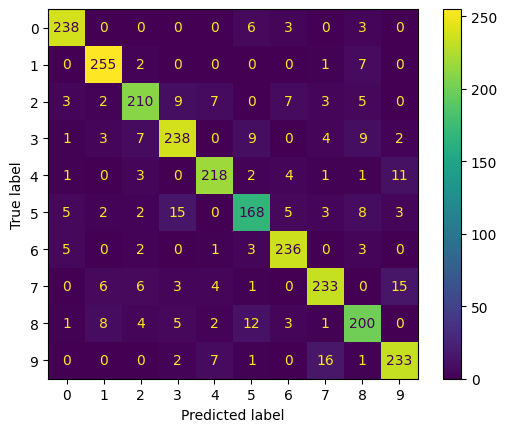

In [87]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_kpca_lda, y_train)
y_pred_test = rbf_svm.predict(X_test_kpca_lda)
y_pred_train = rbf_svm.predict(X_train_kpca_lda)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()